# Memahami Faktor-Faktor Kesuksesan Suatu Video Game dari Toko Online "Ice"
## Pendahuluan
Pada proyek ini, kami akan melakukan analisis data terkait penjualan dan ulasan video game dari toko online "Ice". Dataset yang digunakan mencakup informasi tentang berbagai aspek game, seperti platform, tahun rilis, genre, penjualan di berbagai wilayah, skor ulasan kritikus, skor ulasan pengguna, dan rating ESRB. Dengan dataset ini, kami bertujuan untuk mengidentifikasi pola-pola yang dapat membantu kami memahami faktor-faktor yang memengaruhi kesuksesan suatu game.



### Tujuan
- Menganalisis Tren Penjualan: Tujuan utama proyek ini adalah untuk menganalisis tren penjualan video game di berbagai wilayah, termasuk Amerika Utara, Eropa, dan Jepang. Kami akan mencoba memahami bagaimana preferensi pasar berbeda-beda di seluruh dunia.

- Menentukan Faktor Kesuksesan Game: Kami akan mencoba mengidentifikasi faktor-faktor yang berkontribusi terhadap kesuksesan suatu game, baik dari segi penjualan maupun ulasan. Ini termasuk memeriksa hubungan antara skor ulasan kritikus, skor ulasan pengguna, genre, platform, dan rating ESRB dengan penjualan game.

- Merencanakan Kampanye Iklan: Melalui pemahaman yang kami peroleh dari analisis data, kami akan merencanakan kampanye iklan yang lebih efektif untuk game-game yang memiliki potensi tinggi. Hal ini akan membantu toko online "Ice" dalam meningkatkan penjualan dan memaksimalkan keuntungan.

### Tahapan
Berikut tahapan yang akan kita lakukan untuk project ini. Dengan file path: `/datasets/games.csv`

1. Memuat dan Mempersiapkan Data
2. Memanipulasi Data
3. Menganalisa Data
4. Melakukan Pemrofilan Pengguna Untuk Masing-Masing Wilayah
5. Menguji Hipotesis Rata-rata rating pengguna platform Xbox One dan PC adalah sama dan —Rata-rata rating pengguna genre Action dan Sports berbeda.
6. Menuliskan Kesimpulan Umum

--------

## Inisialisasi

In [1]:
# list library yang digunakan
from scipy import stats as st
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random



- Mari kita import library yang kita butuhkan.

## Memuat Data
- Dengan dataset ini mari kita namakan variabel df_games untuk analisa ke depannya.

In [2]:
# memuat dataframe
df_games = pd.read_csv("/datasets/games.csv")


## Mempersiapkan Data

- Di bagian ini kita akan mempersiapkan dataset yang kita gunakan. Pemanggilan variabel df_games akan banyak melibatkan yaitu pembersihan data, memeriksa kesesuaian tipe data dan hal lainnya untuk kita rasa perlu dimanipulasi agar sesuai dengan analisis.

### Deskripsi & Informasi Data

- Pengulasan data dan keputusan apa saja yang harus kita ambil

In [3]:
# menampilkan informasi data
df_games.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


- `Name` (nama)
- `Platform`
- `Year_of_Release` (tahun rilis)
- `Genre`
- `NA_sales` (penjualan di Amerika Utara dalam satuan juta USD)
- `EU_sales` (penjualan di Eropa dalam satuan juta USD)
- `JP_sales` (penjualan di Jepang dalam satuan juta USD)
- `Other_sales` (penjualan di negara lainnya dalam satuan juta USD)
- `Critic_Score` (skor ulasan dari kritikus, maksimal 100)
- `User_Score` (skor ulasan dari pengguna, maksimal 10)
- `Rating` (ESRB atau rating untuk kategori umur)

- <font color='green'>Temuan</font>

Diketahui, terdapat 16715 entries yang di mana kolom Name, Year_of_Release, Genre, Critic_Score, User_Score dan Rating memiliki banyak nilai kosong yaitu(secara berurutan): 2, 16446, 2, 8137, 10014, 9949, di mana entry maksimal yaitu 16715. 

Selain itu, beberapa tipe data memungkinkan memiliki ketidak sesuaian untuk setiap kolomnya, sehingga kita harus perlu analisa lebih dalam apakah tipe data yang ada di dalam kolom-kolom tersebut sesuai atau tidak. Ada juga nama-nama kolom memiliki karakter uppercase untuk semua kolom. Kita akan menggantinya sama rata dengan lowercase.

In [4]:
# memeriksa isi data
df_games

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [5]:
df_games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
df_games.tail()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


- <font color='green'>Temuan</font>

Kita bisa melihat bahwa kehilangan data yang dialami oleh masing-masing kolomg memiliki pola yang identik atau simetris. Besar kemungkinan ketika sedang dihasilkan atau dikonversi atau pemrosesan lainnya mengakibatkan masalah yang serupa.

In [7]:
# mari kita periksa jumlah nilai hilang
df_games_missing_values = df_games.isna().sum()
df_games_missing_values

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

- Dari kolom yang memiliki nilai hilang yang kecil, kita masih belum mengetahui apakah nilai tersebut memiliki dampak yang seperti apa.

In [8]:
# tampilkan jumlah sample nilai yang hilang saja
df_games_missing_data_rows = df_games[df_games.isna().any(axis=1)]
df_games_missing_data_rows.sample(50)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16453,Act of Aggression,PC,2015.0,Strategy,0.00,0.01,0.00,0.00,71.0,7.1,NaN
4646,Zack & Wiki: Quest for Barbaros' Treasure,Wii,2007.0,Adventure,0.18,0.16,0.03,0.04,NaN,NaN,NaN
11172,WRC 5: FIA World Rally Championship,PS3,2015.0,Sports,0.02,0.05,0.00,0.01,NaN,NaN,NaN
4995,Wolfenstein: The New Order,X360,2014.0,Shooter,0.18,0.17,0.00,0.03,NaN,7.4,M
8197,NBA Starting Five,PS2,NaN,Sports,0.09,0.07,0.00,0.02,53.0,7.3,E
15339,Sugoi Hebereke,SNES,1994.0,Fighting,0.00,0.00,0.02,0.00,NaN,NaN,NaN
11652,Just Dance: Disney Party 2,WiiU,2015.0,Action,0.06,0.01,0.00,0.01,NaN,tbd,E
14798,Yuusha Shisu.,PSV,2016.0,Role-Playing,0.00,0.00,0.03,0.00,NaN,NaN,NaN
10182,Tales of Phantasia (PS1 & PSP Versions),PSP,2006.0,Role-Playing,0.00,0.00,0.11,0.00,NaN,NaN,NaN
10135,The Fairly Odd Parents: Breakin Da Rules,XB,2003.0,Platform,0.08,0.02,0.00,0.00,NaN,NaN,NaN


- <font color='green'>Kesimpulan Sementara</font>

Dari tampilan di atas ternyata data tidak sangat simetris. Beberapa baris sedikitnya memiliki data nilai yang kosong berbeda dengan kolom yang lainnya(tidak kosong yang serupa).

----------

## Memanipulasi Data
- Kita akan mengubah apa yang harus diubah dan lebih meniliti lagi langkah apa dan mengapa kita harus melakukan manipulasi pada data untuk setiap kolom tertentu.

In [9]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


- Mari kita gunakan method .info() untuk preview

### Mengganti Nama Kolom Menggunakan Lowercase

- Mari kita ubah nama kolom seluruhnya dengan lowercase agar mudah untuk dipanggil.

In [10]:
# preview untuk sebelum diproses
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [11]:
# mengubah nama semua kolom dalam df_games menjadi lowercase
df_games.columns = df_games.columns.str.lower()

In [12]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [13]:
df_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [14]:
# memanipulasi data yang tidak relevan
df_games = df_games.loc[(df_games['year_of_release'] != None) & (df_games['year_of_release'] >= 2000)].reset_index(drop=True)

- Di sini kita akan menghapus data yang tidak relevan. Kita akan mulai dari tahun 2000 hingga tahun maksimal yaitu 2016

-------

### Mengkonversi Tipe Data yang Dibutuhkan

- Kita akan mengkonversi tipe data yang dibutuhkan untuk kebutuhan analisa.

In [15]:
# preview tipe dataset yang akan kita ubah
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14470 entries, 0 to 14469
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             14470 non-null  object 
 1   platform         14470 non-null  object 
 2   year_of_release  14470 non-null  float64
 3   genre            14470 non-null  object 
 4   na_sales         14470 non-null  float64
 5   eu_sales         14470 non-null  float64
 6   jp_sales         14470 non-null  float64
 7   other_sales      14470 non-null  float64
 8   critic_score     7887 non-null   float64
 9   user_score       9738 non-null   object 
 10  rating           9663 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.2+ MB


In [16]:
df_games.head(50)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
2,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
3,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
4,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
5,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
6,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
7,Mario Kart DS,DS,2005.0,Racing,9.71,7.47,4.13,1.90,91.0,8.6,E
8,Wii Fit,Wii,2007.0,Sports,8.92,8.03,3.60,2.15,80.0,7.7,E
9,Kinect Adventures!,X360,2010.0,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E


- Sekarang kita hanya perlu memeriksa tipe data yang akan kita ubah.

In [17]:
# mengubah tipe data kolom year_of_release
df_games['year_of_release'] = df_games['year_of_release'].astype('int64')

In [18]:
# memeriksa tipe data object pada kolom user_score
df_games[df_games['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
92,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
231,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
408,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
507,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
560,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
14450,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
14452,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
14453,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
14459,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


- user_score memiliki tipe data object yang di mana object tersebut tidak hanya angka tetapi ditulis sebagai "tbd"(to be determined). Di sini kita akan ubah ke float karena melihat hasil yang desimal pada dasarnya.

In [19]:
# mengubah tipe data kolom user_score
df_games['user_score'].replace('tbd', np.nan, inplace=True)
df_games['user_score'] = df_games['user_score'].astype('float64')*10

- Nilai tbd akan diubah menjadi NaN, "to be determined" atau "akan ditentukan" merupakan hal yang tidak berpengaruh dalam perhitungan analisa, karena kita bisa menggangapnya belum ada penilaian atau nilai memang kosong.

In [20]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14470 entries, 0 to 14469
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             14470 non-null  object 
 1   platform         14470 non-null  object 
 2   year_of_release  14470 non-null  int64  
 3   genre            14470 non-null  object 
 4   na_sales         14470 non-null  float64
 5   eu_sales         14470 non-null  float64
 6   jp_sales         14470 non-null  float64
 7   other_sales      14470 non-null  float64
 8   critic_score     7887 non-null   float64
 9   user_score       7371 non-null   float64
 10  rating           9663 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.2+ MB


In [21]:
df_games.head(50)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E
1,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E
2,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E
3,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,85.0,E
4,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,66.0,E
5,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,84.0,E
6,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
7,Mario Kart DS,DS,2005,Racing,9.71,7.47,4.13,1.90,91.0,86.0,E
8,Wii Fit,Wii,2007,Sports,8.92,8.03,3.60,2.15,80.0,77.0,E
9,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,63.0,E


- <font color='green'>Kesimpulan Sementara</font>

Untuk saat ini kita tidak perlu mengubah beberapa dari kolom penjualan. Hal itu dirasa sudah sesuai, Karena pada dasarnya nilai bawaannya lebih dominan di tipe data float. Kita mungkin harus mengubah tipe data year_of_release sebagai int64 agar mudah untuk memfilter tahun. Menggunakan pd.to_datime merupakan hal yang tidak direkomendasikan, dikarenakan memiliki detail tanggal. Di sini kita hanya memerlukan tahun rilisnya saja. Kita bisa lihat sekarang kita memiliki tahun yang sudah dipotong yaitu hanya yang relevan pada tahun 2000 hingga 2016. Sehingga entry data sekarang menjadi 14470. Sekarang kita masih memiliki 3 kolom yang nilainya masih hilang.

--------

### Menangani Nilai yang Hilang

Pada sub tahap ini kita akan menangani nilai-nilai yang hilang. Hal yang harus diperhatikan yaitu konteks kehilangan nilai-nilai dalam dataset tersebut serta relevansi untuk kedepan apakah data tersebut layak untuk diisi dengan cara seperti mean, median, atau nilai acak.

In [22]:
# preview informasi nilai yang hilang
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14470 entries, 0 to 14469
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             14470 non-null  object 
 1   platform         14470 non-null  object 
 2   year_of_release  14470 non-null  int64  
 3   genre            14470 non-null  object 
 4   na_sales         14470 non-null  float64
 5   eu_sales         14470 non-null  float64
 6   jp_sales         14470 non-null  float64
 7   other_sales      14470 non-null  float64
 8   critic_score     7887 non-null   float64
 9   user_score       7371 non-null   float64
 10  rating           9663 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.2+ MB


- Pertama kita akan melakukan pemeriksaan nilai yang hilang mengurut berdasarkan nilai yang hilang. Kita akan mengabaikan nilai kosong yang jumlahnya sedikit, seperti pada kolom name dan genre, karena dengan jumlah hilang yang dibilang sangat sedikit, tidak begitu memengaruhi analisa kita.

In [23]:
df_games.head(50)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E
1,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E
2,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E
3,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,85.0,E
4,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,66.0,E
5,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,84.0,E
6,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
7,Mario Kart DS,DS,2005,Racing,9.71,7.47,4.13,1.90,91.0,86.0,E
8,Wii Fit,Wii,2007,Sports,8.92,8.03,3.60,2.15,80.0,77.0,E
9,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,63.0,E


- <font color='green'>Kesimpulan Sementara</font>

Berhubung kita sudah mengikis tahun-tahun yang hilang, kita hanya perlu mengurus nilai hilang pada kolom critic_score, user_score dan rating. Sasmple di atas sekarang sudah memiliki pola yang cukup baik.

In [24]:
# critic_score 
print(df_games['critic_score'].min(), df_games['critic_score'].max())

13.0 98.0


In [25]:
# user_score
print(df_games['user_score'].min(), df_games['user_score'].max())

0.0 97.0


In [26]:
# Menggantikan nilai-nilai NaN dalam kolom 'critic_score' dengan nilai-nilai acak dalam rentang 13 hingga 98
random_scores = np.random.randint(13, 99, size=len(df_games['critic_score']))
df_games['critic_score'] = df_games['critic_score'].fillna(pd.Series(random_scores))




In [27]:
# Menggantikan nilai-nilai NaN dalam kolom 'user_score' dengan nilai-nilai acak dalam rentang 0 hingga 97
random_user = np.random.randint(0, 97, size=len(df_games['user_score']))
df_games['user_score'] = df_games['user_score'].fillna(pd.Series(random_user))



In [28]:
df_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E
1,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E
2,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E
3,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,85.0,E
4,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,66.0,E
...,...,...,...,...,...,...,...,...,...,...,...
14465,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,14.0,43.0,NaN
14466,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,48.0,59.0,NaN
14467,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,16.0,55.0,NaN
14468,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,29.0,10.0,NaN


- <font color='green'>Kesimpulan Sementara</font>

Untuk sementara, ke dua kolom tersebut yaitu critic_score dan user_score yang nilainya hilang terlah diisi oleh nilai acak. Untuk kolom rating, kita akan biarkan kolom tersebut dengan seadanya.

In [29]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14470 entries, 0 to 14469
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             14470 non-null  object 
 1   platform         14470 non-null  object 
 2   year_of_release  14470 non-null  int64  
 3   genre            14470 non-null  object 
 4   na_sales         14470 non-null  float64
 5   eu_sales         14470 non-null  float64
 6   jp_sales         14470 non-null  float64
 7   other_sales      14470 non-null  float64
 8   critic_score     14470 non-null  float64
 9   user_score       14470 non-null  float64
 10  rating           9663 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.2+ MB


- Berikut informasi data yang telah kita perbaharui.

------------------

### Menjumlahkan Penjualan di Semua Wilayah

- Di bagian manipulasi data, kita akan menambahkan 1 lagi yaitu menjumlahkan penjualan di semua wilayah, dengan nama kolom total_sales.

In [30]:
# menjumlahkan penjualan pada setiap wilayah untuk setiap game
df_games['total_sales'] = df_games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)


- Tidak terdapat nilai hilang pada ke empat kolom tersebut, maka kita jumlahkan seluruhnya untuk menghasilkan kolom baru yaitu total_sales

In [31]:
df_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E,82.54
1,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E,35.52
2,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E,32.77
3,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,85.0,E,29.80
4,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,66.0,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
14465,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,14.0,43.0,NaN,0.01
14466,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,48.0,59.0,NaN,0.01
14467,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,16.0,55.0,NaN,0.01
14468,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,29.0,10.0,NaN,0.01


- Setelah semua proses manipulasi data dilakukan, kita bisa lakukan analisa data lebih lanjut.

---------------

## Menganalisa Data
- Bagian ini merupakan hasil dari data cleansing yang akan kita analisa.

### Analisa Berapa Banyak Game yang Diluncurkan pada Tahun yang Berbeda

- Kita akan agregasikan terlebih dahulu game yang bermunculan di tahun yang berbeda.

In [32]:
# menghitung jumlah game yang diluncurkan di tahun yang berbeda
game_tahun_count = pd.pivot_table(df_games, index = 'year_of_release', values = 'name', aggfunc = 'count').reset_index()
game_tahun_count

,year_of_release,name
0,2000,350
1,2001,482
2,2002,829
3,2003,775
4,2004,762
5,2005,939
6,2006,1006
7,2007,1197
8,2008,1427
9,2009,1426


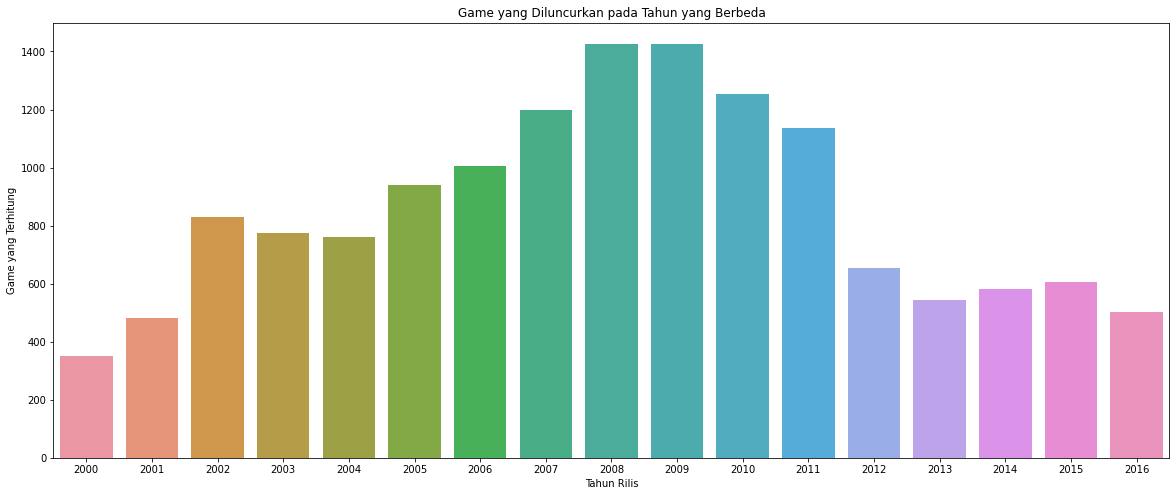

In [33]:
plt.figure(figsize = (20,8))
sns.barplot(data=game_tahun_count, x = 'year_of_release', y = 'name')
plt.title('Game yang Diluncurkan pada Tahun yang Berbeda')
plt.xlabel('Tahun Rilis')
plt.ylabel('Game yang Terhitung')
plt.show()



- Mari kita lihat dengan lineplot

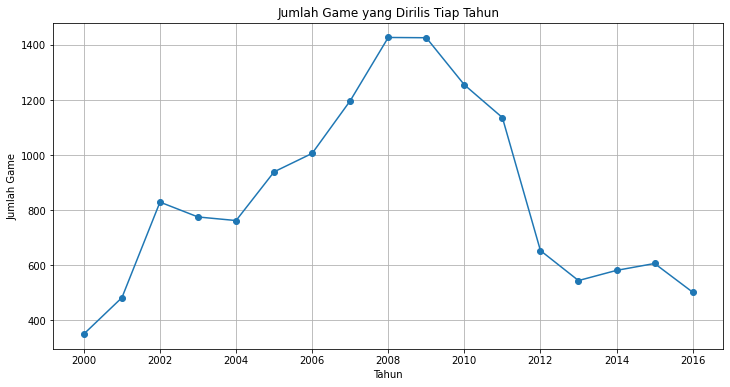

In [34]:
# Mengambil data jumlah game yang dirilis tiap tahun
tahun = df_games['year_of_release'].value_counts().sort_index().index
jumlah_game = df_games['year_of_release'].value_counts().sort_index().values

# Membuat grafik garis
plt.figure(figsize=(12, 6))
plt.plot(tahun, jumlah_game, marker='o', linestyle='-')

# Menambahkan judul dan label sumbu
plt.title('Jumlah Game yang Dirilis Tiap Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Game')

# Menampilkan grid
plt.grid(True)

# Menampilkan grafik
plt.show()



- <font color='green'>Kesimpulan Sementara</font>

Kita bisa lihat dengan plot yang dihasilkan, bahwa pada tahun 2008-2009 merupakan puncak performa sebuah game yang berfrekuensi tinggi. Setelah ke 2 tahun itu lewat, penjualan jumlah game di tahun yang berbeda mengalami penurunan yang cukup signifikan. 




---------

### Bagaimana Penjualan Bervariasi dari Satu Platform ke Platform Lainnya

- Kita akan pilih platform dengan total penjualan terbesar dan buat distribusinya berdasarkan data per tahun. Cari platform yang dahulu populer, tetapi sekarang tidak memiliki penjualan apa pun. Berapa lama biasanya waktu yang dibutuhkan platform baru untuk muncul dan platform lama untuk memudar popularitasnya?

- Lihat bagaimana penjualan bervariasi dari satu platform ke platform lainnya. Pilih platform dengan total penjualan terbesar dan buat distribusinya berdasarkan data per tahun.

In [35]:
# menjumlahkan jumlah popularitas untuk semua game
df_games_lifetime = pd.pivot_table(df_games, index = 'year_of_release', values = 'total_sales', columns = 'platform', aggfunc = 'sum').fillna(0)



In [36]:
df_games_lifetime

platform,3DS,DC,DS,GB,GBA,GC,N64,PC,PS,PS2,PS3,PS4,PSP,PSV,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,
2000,0.00,5.99,0.00,19.76,0.07,0.00,33.97,4.66,96.37,39.17,0.00,0.00,0.00,0.00,0.68,0.00,0.00,0.00,0.99,0.00
2001,0.00,1.07,0.00,9.24,61.53,26.34,3.25,5.47,35.59,166.43,0.00,0.00,0.00,0.00,0.28,0.00,0.00,0.00,22.26,0.00
2002,0.00,0.29,0.00,0.00,74.16,51.81,0.08,8.57,6.67,205.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,48.01,0.00
2003,0.00,0.00,0.00,0.00,56.67,50.61,0.00,8.84,2.07,184.31,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,55.04,0.00
2004,0.00,0.00,17.27,0.00,77.91,28.82,0.00,10.39,0.00,211.81,0.00,0.00,7.06,0.00,0.00,0.00,0.00,0.00,65.42,0.00
2005,0.00,0.00,130.14,0.00,33.86,27.62,0.00,4.37,0.00,160.66,0.00,0.00,43.84,0.00,0.00,0.00,0.00,8.25,49.08,0.00
2006,0.00,0.00,119.81,0.00,5.28,11.26,0.00,2.85,0.00,103.42,20.96,0.00,55.32,0.00,0.00,137.15,0.00,51.62,10.04,0.00
2007,0.00,0.02,146.94,0.00,3.40,0.27,0.00,9.28,0.00,75.99,73.19,0.00,46.93,0.00,0.00,152.77,0.00,95.41,0.55,0.00
2008,0.00,0.04,145.31,0.00,0.00,0.00,0.00,12.42,0.00,53.90,118.52,0.00,34.55,0.00,0.00,171.32,0.00,135.26,0.18,0.00


- Kita akan coba asumsikan untuk lifetime setiap console dan total penjualan untuk setiap tahunnya.

<AxesSubplot:xlabel='platform'>

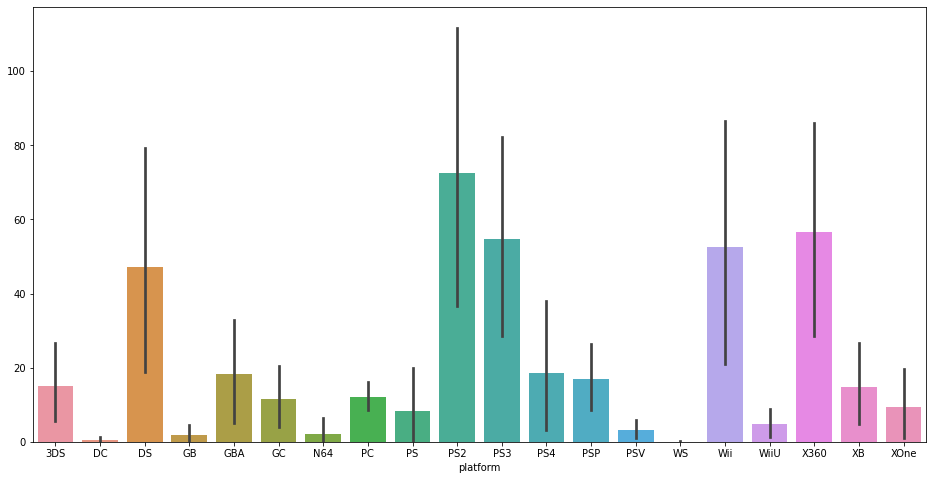

In [37]:
plt.figure(figsize = (16,8))
sns.barplot(data=df_games_lifetime)


- Mari kita coba untuk mengambil beberapa sample yaitu Wii, DS, dan X360 untuk mengetahui berapa lamanya popularitas console itu bertahan.


<AxesSubplot:xlabel='year_of_release'>

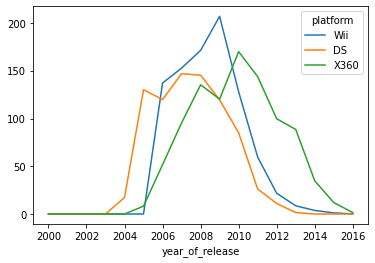

In [38]:
# membuat lineplot untuk menampilkan 3 sample yang dipilih
df_games_lifetime[['Wii', 'DS', 'X360']].plot()

- Bisa dilihat, masing-masing yang dulunya populer menempati hampir tidak ada penjualan di tahun sekarang(2016) serta masing-masing dari sample memiliki variasi yang berbeda secara fluktuatif data. Memudarnya sebuah contoh sample memiliki turun yang beragam.

- <font color='green'>Kesimpulan Sementara</font>

Kita bisa asumsikan dari data tersebut bahwa besarnya popularitas diakibatkan oleh banyaknya total penjualan untuk setiap tahunnya. 

- Mari kita periksa per platformnya.

In [39]:
df_games['platform'].value_counts()

PS2     2127
DS      2120
PS3     1306
Wii     1286
X360    1232
PSP     1193
PC       917
GBA      811
XB       803
GC       542
3DS      512
PSV      429
PS4      392
PS       274
XOne     247
WiiU     147
N64       70
DC        31
GB        27
WS         4
Name: platform, dtype: int64

- Bisa kita lihat bahwa PS2 memiliki jumlah penjualan yang sangat banyak. Mari kita teliti lebih dalam distribusinya. Kita akan coba melakukan analisa untuk platform yang memiliki jumlah yang sangat banyak berdasarkan value_counts()

In [40]:
# Menghitung total penjualan untuk setiap platform
platform_sales = df_games.groupby('platform')['total_sales'].sum().reset_index()


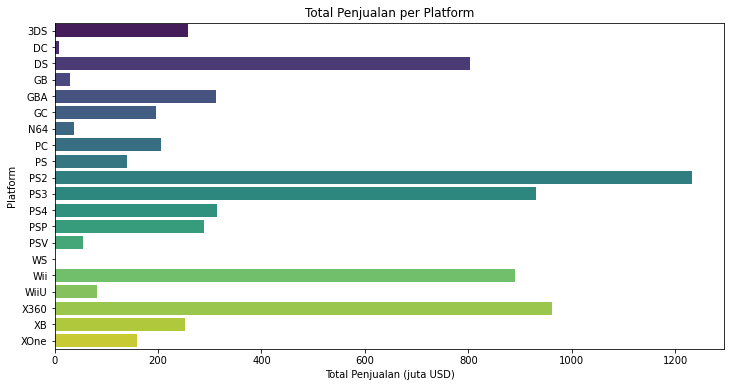

In [41]:
# Membuat bar plot visualisasi penjualan untuk platform
plt.figure(figsize=(12, 6))
sns.barplot(x='total_sales', y='platform', data=platform_sales, palette='viridis')
plt.title('Total Penjualan per Platform')
plt.xlabel('Total Penjualan (juta USD)')
plt.ylabel('Platform')
plt.show()


- Mari kita lihat penjualan distribusi pada platform terbesar yaitu PS2

In [42]:
# Menemukan platform dengan total penjualan terbesar
platform_terbesar = platform_sales[platform_sales['total_sales'] == platform_sales['total_sales'].max()]
print("Platform dengan total penjualan terbesar :")
print(platform_terbesar)


Platform dengan total penjualan terbesar :
  platform  total_sales
9      PS2      1233.56


In [43]:
# Memilih data penjualan hanya untuk platform terbesar
data_platform_terbesar = df_games[df_games['platform'] == platform_terbesar['platform'].values[0]]

# Membuat distribusi penjualan per tahun
platform_sales_per_tahun = data_platform_terbesar.groupby('year_of_release')['total_sales'].sum()

# Menampilkan distribusi penjualan
print("Distribusi penjualan per tahun untuk platform terbesar:")
print(platform_sales_per_tahun)


Distribusi penjualan per tahun untuk platform terbesar:
year_of_release
2000     39.17
2001    166.43
2002    205.38
2003    184.31
2004    211.81
2005    160.66
2006    103.42
2007     75.99
2008     53.90
2009     26.40
2010      5.64
2011      0.45
Name: total_sales, dtype: float64


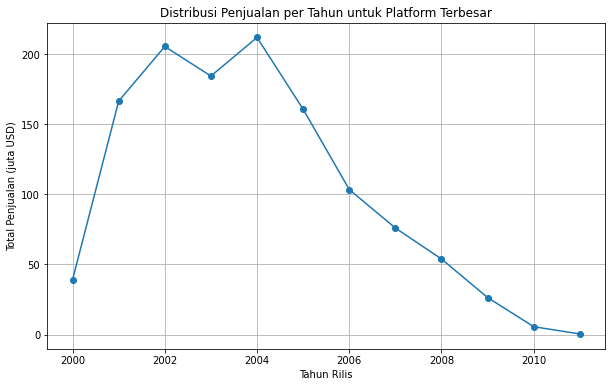

In [44]:
# Data distribusi penjualan per tahun
tahun = platform_sales_per_tahun.index
penjualan = platform_sales_per_tahun.values

# Membuat plot
plt.figure(figsize=(10, 6))
plt.plot(tahun, penjualan, marker='o', linestyle='-')
plt.title('Distribusi Penjualan per Tahun untuk Platform Terbesar')
plt.xlabel('Tahun Rilis')
plt.ylabel('Total Penjualan (juta USD)')
plt.grid(True)
plt.show()


- <font color='green'>Kesimpulan Sementara</font>

Seperti yang kita sebutkan, platform terbesar pada penjualan ini di rentang tahun 2000 hingga 2016 adalah PS2 dengan total penjualan sekitar  1233.56 juta USD. Platform tersebut mengalami penurunan disekitar tahun 2010, yang berarti PS2 mengalami kejadian ini cukup lama yaitu tumbuh dan memudarnya sekitar 10 tahun.

---------------------------

### Menentukan Periode Waktu Pengambilan Data

- Tentukan periode waktu pengambilan data. Untuk melakukannya, Kita lihat jawaban di pertanyaan sebelumnya. Data yang kita ambil seharusnya memungkinkan kita untuk membangun model bagi tahun 2017.

In [45]:
# informasi umum
df_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E,82.54
1,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E,35.52
2,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E,32.77
3,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,85.0,E,29.80
4,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,66.0,E,28.91


- Pada kasus ini kita akan memfilter kembali datanya. Kita akan mengambil data 5 tahun ke belakang. Maksimal yang didapat dari data yang sedang kita kerjakan yaitu 2016 yang berarti kita akan mengambil data yang cukup relevan untuk mendukung bab ini yaitu mulai dari 2011.


- Relevansi ini sangat kuat, karena industri game merupakan industri yang sangat cepat berkembang. Berbicara dengan sistem yang mereka implementasikan, performa yang kuat serta hal yang lainnya. Ambil contoh, salah satu komponen yang berpengaruh pada di dunia game yaitu GPU yang dipakai saat ini. Bisa saja tidak akan support untuk game 5 tahun ke depan atau mengalami penurunan performa pada game berikutnya. Game akan terus berkembang seiring dengan juga pabrik yang menghasilkan grafis untuk game-game yang sedang dikembangkan. Mungkin saja analisa yang akan kita pakai seumpama di tahun 2030, bisa saja kita hanya menggunakan data 1 atau 2 tahun yang lalu.

In [46]:
# membuat data yang mulai dari tahun 2011
df_games_2011 = df_games[df_games['year_of_release'] >= 2011].reset_index(drop=True)

In [47]:
# bentuk data sudah fix
df_games.shape ,  df_games_2011.shape

((14470, 12), (4022, 12))

In [48]:
# tampilkan data 5 tahun lalu 
df_games_2011.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,82.0,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,81.0,M,16.27
2,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,34.0,M,14.73
3,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,23.0,53.0,NaN,14.63
4,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,51.0,92.0,NaN,14.60


- Baik, kita telah memfilter data untuk mulai dari tahun 2011.

-------------------

### Mengerjakan Data yang Relevan

- Sebelumnya kita sudah menentukan model data yang telah kita tentukan dengan menggunakan variable df_games_2011. Yang di mana kita akan mulai dari 5 tahun lalu untuk permodelan berikutnya. Sebelumnya relevansi data sudah kita hapus terlebih dahulu yaitu mengabaikan tahun-tahun. Karena sudah jelas, seluruh game yang di bawah tahun 2000 dipastikan tidak relevan.

In [49]:
# Menghitung total penjualan untuk setiap platform
platform_sales_2011 = df_games_2011.groupby('platform')['total_sales'].sum().reset_index()

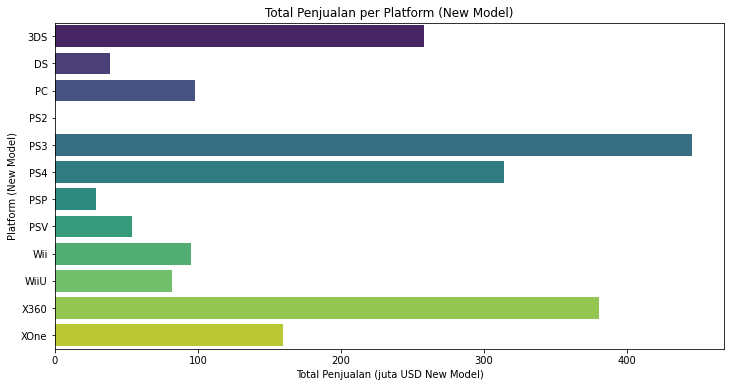

In [50]:
# Membuat bar plot visualisasi penjualan untuk platform
plt.figure(figsize=(12, 6))
sns.barplot(x='total_sales', y='platform', data=platform_sales_2011, palette='viridis')
plt.title("Total Penjualan per Platform (New Model)")
plt.xlabel('Total Penjualan (juta USD New Model)')
plt.ylabel('Platform (New Model)')
plt.show()


- <font color='green'>Kesimpulan Sementara</font>

 Untuk permodelan baru saat ini PS3 memiliki potensi besar untuk penjualan. Namun kita bisa mengetahui bahwa popularitas X360 masih banyak dalam high demand. Besar kemungkinan PS4 akan mungkin menyusul keduanya. 

 Mari kita lihat distribusi total penjualan PS3 terlebih dahulu.

In [51]:
# Menemukan platform dengan total penjualan terbesar
platform_terbesar_2011 = platform_sales_2011[platform_sales_2011['total_sales'] == platform_sales_2011['total_sales'].max()]
print("Platform dengan total penjualan terbesar :")
print(platform_terbesar_2011)

Platform dengan total penjualan terbesar :
  platform  total_sales
4      PS3       445.57


In [52]:
# membuat distribusi platform terbesar untuk data new model
# Memilih data penjualan hanya untuk platform terbesar
data_platform_terbesar_2011 = df_games_2011[df_games_2011['platform'] == platform_terbesar_2011['platform'].values[0]]

# Membuat distribusi penjualan per tahun
platform_sales_per_tahun_2011 = data_platform_terbesar_2011.groupby('year_of_release')['total_sales'].sum()

# Menampilkan distribusi penjualan
print("Distribusi penjualan per tahun untuk platform terbesar (New Model):")
print(platform_sales_per_tahun_2011)


Distribusi penjualan per tahun untuk platform terbesar (New Model):
year_of_release
2011    156.78
2012    107.36
2013    113.25
2014     47.76
2015     16.82
2016      3.60
Name: total_sales, dtype: float64


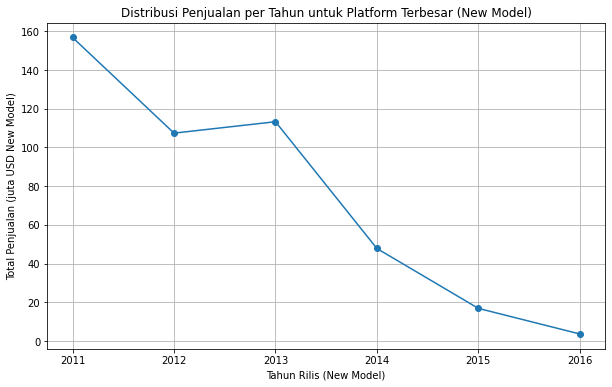

In [53]:
# Data distribusi penjualan per tahun
tahun_2011 = platform_sales_per_tahun_2011.index
penjualan_2011 = platform_sales_per_tahun_2011.values

# Membuat plot
plt.figure(figsize=(10, 6))
plt.plot(tahun_2011, penjualan_2011, marker='o', linestyle='-')
plt.title('Distribusi Penjualan per Tahun untuk Platform Terbesar (New Model)')
plt.xlabel('Tahun Rilis (New Model)')
plt.ylabel('Total Penjualan (juta USD New Model)')
plt.grid(True)
plt.show()


- <font color='green'>Kesimpulan Sementara</font>

Bisa dipastikan bahwa penjualan PS3 akan semakin menyusut dikarenakan trend yang akan datang. 


- Mari kita coba mengambil 3 sample yang dahulunya populer sebelum total penjualan PS3. Apakah mengalami penyusutan?

In [54]:
# menjumlahkan jumlah total penjualan untuk semua game (new model)
df_games_lifetime_2011 = pd.pivot_table(df_games_2011, index = 'year_of_release', values = 'total_sales', columns = 'platform', aggfunc = 'sum').fillna(0)



In [55]:
df_games_lifetime_2011

platform,3DS,DS,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,,
2011,63.20,26.18,35.03,0.45,156.78,0.00,17.82,4.63,59.65,0.00,143.84,0.00
2012,51.36,11.01,23.22,0.00,107.36,0.00,7.69,16.19,21.71,17.56,99.74,0.00
2013,56.57,1.54,12.38,0.00,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,0.00,13.28,0.00,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,0.00,8.52,0.00,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,0.00,5.25,0.00,3.60,69.25,0.00,4.25,0.18,4.60,1.52,26.15


- Mari kita ambil sample dari 3DS, PS4, dan X360

<AxesSubplot:xlabel='year_of_release'>

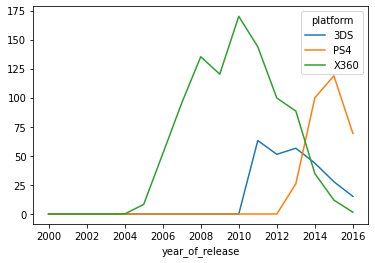

In [56]:
# menampilkan total penjualan sesudah berakhirnya platform PS3
df_games_lifetime[['3DS', 'PS4', 'X360']].plot()

- <font color='green'>Kesimpulan Sementara</font>

Bisa kita lihat bahwa PS4 memiliki kemungkinan besar untuk tumbuh di tahun-tahun berikutnya. Hal ini merupakan memang sudah jelas karena PS4 merupakan sebuah upgrade dari PS3 yang memungkinkan untuk mewadahi game-game dengan performa yang lebih tinggi. Mungkin kita bisa beranggapan bahwa PS4 sedang menuju transisi untuk tumbuh atau baru saja rilis di sekitar tahun 2012.

----------

### Membuat Boxplot untuk Penjualan Global Semua Game yang Dikelompokan Berdasarkan Platform

- Dengan model data yang baru, apakah perbedaan penjualannya signifikan? Bagaimana dengan penjualan rata-rata pada berbagai platform?

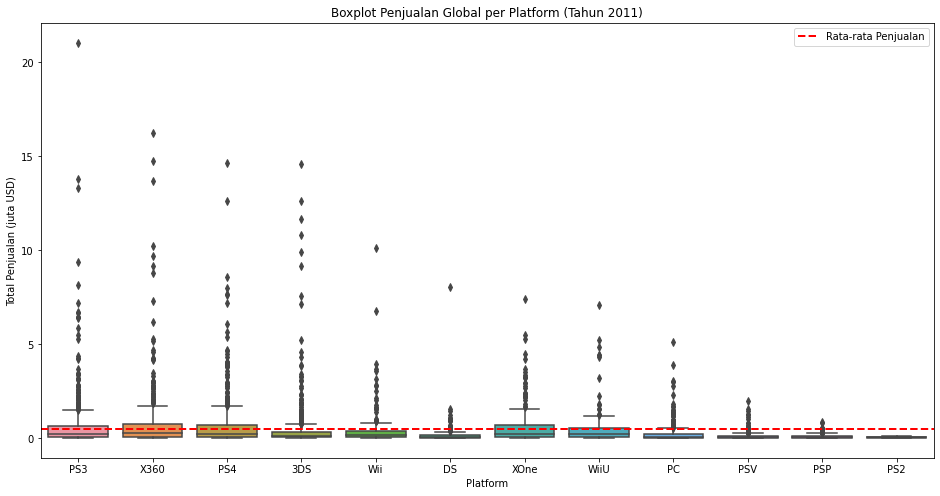

In [57]:
# membuat boxplot dengan rata-rata
plt.figure(figsize=(16, 8))
sns.boxplot(data=df_games_2011, x='platform', y='total_sales')
plt.title('Boxplot Penjualan Global per Platform (Tahun 2011)')
plt.xlabel('Platform')
plt.ylabel('Total Penjualan (juta USD)')

# Menambahkan garis rata-rata untuk setiap platform
plt.axhline(df_games_2011['total_sales'].mean(), color='r', linestyle='dashed', linewidth=2, label='Rata-rata Penjualan')
plt.legend()

plt.show()

In [58]:
df_games.groupby('platform').agg({'total_sales' : ['mean','median','max','min']}).reset_index()

platform total_sales                    
                   mean median    max   min
0       3DS    0.503535  0.120  14.60  0.01
1        DC    0.239032  0.120   1.81  0.02
2        DS    0.378660  0.110  29.80  0.01
3        GB    1.074074  0.810   6.39  0.07
4       GBA    0.385795  0.160  15.84  0.01
5        GC    0.362970  0.150   7.06  0.01
6       N64    0.532857  0.220   3.36  0.01
7        PC    0.224340  0.040   8.01  0.01
8        PS    0.513504  0.245   5.31  0.01
9       PS2    0.579953  0.230  20.81  0.00
10      PS3    0.713124  0.280  21.05  0.00
11      PS4    0.801378  0.200  14.63  0.01
12      PSP    0.242691  0.090   7.68  0.01
13      PSV    0.125431  0.050   1.96  0.01
14       WS    0.240000  0.210   0.51  0.03
15      Wii    0.692986  0.190  82.54  0.01
16     WiiU    0.559116  0.220   7.09  0.01
17     X360    0.780227  0.280  21.82  0.01
18       XB    0.313288  0.150   8.48  0.01
19     XOne    0.645020  0.220   7.39  0.01

- <font color='green'>Kesimpulan Sementara</font>

Dengan garis merah yang kita buat, kita bisa mengetahui penjualan yang di atas rata-rata. Penjualan pada platform X360 masih signifikan, namun tidak menutup kemungkinan bahwa penjualan PS4 akan melonjak lebih tinggi. Hal ini dikarenakan dari kesimpulan sementara pada sub bab sebelumnya, bahwa platform PS4 memiliki potensial cukup besar untuk tumbuh.

----------------

### Melihat Ulasan Pengguna dan Para Profesional Memengaruhi Penjualan Pada Salah Satu Platform Populer 

- Kita akan membuat sebuah scatter plot dan hitung korelasi antara ulasan dan penjualan. Kemudian kita akan coba pilih platform PS4.

In [59]:
# mengiris hanya untuk ps4 untuk critic_score & user_score dengan nilai non null
ps4_df_games_2011 = df_games_2011.groupby(['platform', 'name'])['total_sales', 'critic_score', 'user_score'].sum(
).query('platform == "PS4" & critic_score > 0 & user_score > 0').reset_index()

/tmp/ipykernel_73/4105830500.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ps4_df_games_2011 = df_games_2011.groupby(['platform', 'name'])['total_sales', 'critic_score', 'user_score'].sum(


In [60]:
ps4_df_games_2011

,platform,name,total_sales,critic_score,user_score
0,PS4,7 Days to Die,0.14,45.0,59.0
1,PS4,Adventure Time: Finn & Jake Investigations,0.10,51.0,80.0
2,PS4,Aegis of Earth: Protonovus Assault,0.02,57.0,78.0
3,PS4,Agatha Christie's The ABC Murders,0.02,67.0,62.0
4,PS4,Akiba's Trip: Undead & Undressed,0.11,21.0,38.0
...,...,...,...,...,...
384,PS4,Yakuza: Ishin,0.15,25.0,59.0
385,PS4,Yoru no Nai Kuni,0.08,62.0,16.0
386,PS4,ZombiU,0.06,85.0,42.0
387,PS4,Zombie Army Trilogy,0.20,62.0,68.0


In [61]:
# membuat korelasi untuk platform PS4 dengan total_sales
ps4_df_games_2011.corr()['total_sales']

total_sales     1.000000
critic_score    0.222127
user_score      0.063658
Name: total_sales, dtype: float64

<font color='green'>Temuan</font>

- Korelasi antara "total_sales" dan "critic_score" adalah sekitar 0.15, yang cukup rendah. Ini menunjukkan bahwa ada hubungan positif lemah antara skor kritikus dan penjualan total. Artinya, game dengan skor kritikus yang lebih tinggi cenderung memiliki penjualan total yang lebih tinggi, tetapi hubungan ini tidak terlalu kuat.

- Korelasi antara "total_sales" dan "user_score" sangat rendah, yaitu sekitar 0.03. Hal ini menunjukkan bahwa tidak ada hubungan linier yang signifikan antara skor pengguna dan penjualan total. Dengan kata lain, skor pengguna tidak memiliki pengaruh yang kuat terhadap penjualan total game.

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

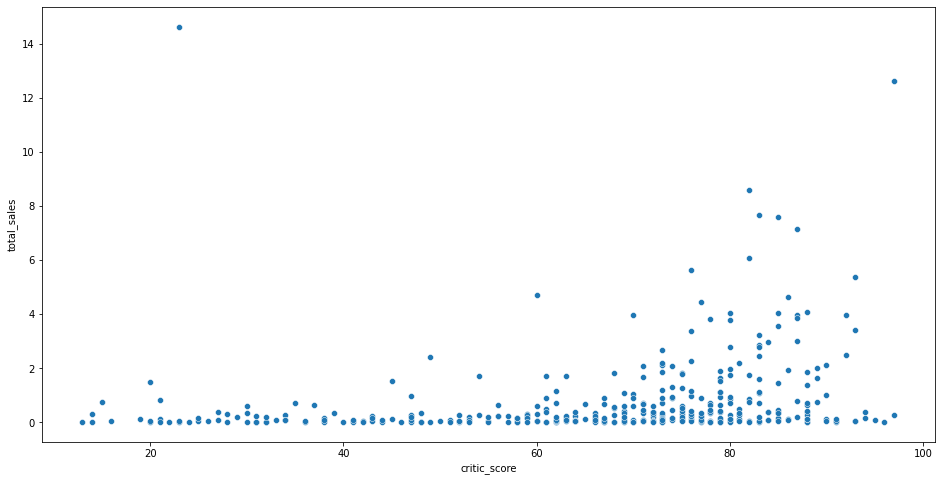

In [62]:
# membuat scatterplot untuk masing-masing yang ditentukan
plt.figure(figsize = (16, 8))
sns.scatterplot(data=ps4_df_games_2011, x = 'critic_score', y='total_sales' )

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

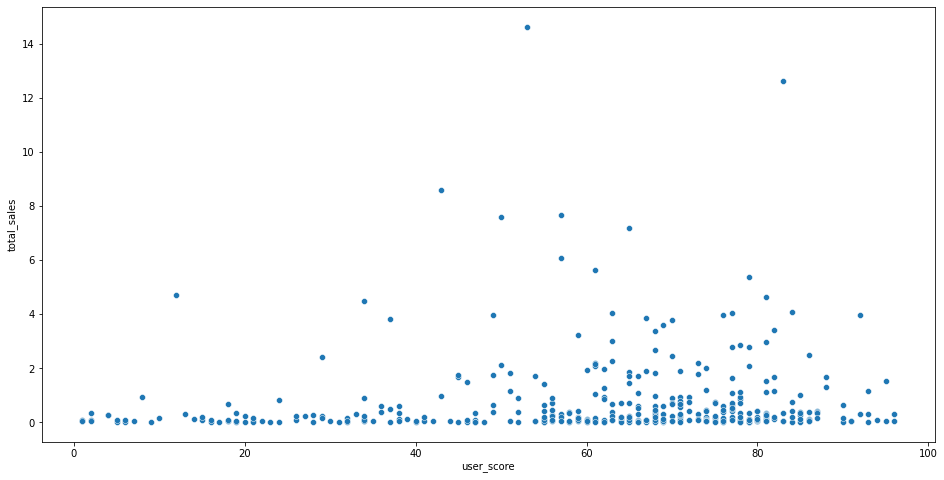

In [63]:
# membuat scatterplot untuk masing-masing yang ditentukan
plt.figure(figsize = (16, 8))
sns.scatterplot(data=ps4_df_games_2011, x = 'user_score', y='total_sales' )

- <font color='green'>Kesimpulan Sementara</font>

Dari kedua yang ditampilkan bisa dipastikan bahwa scatter plot yang dibuat belum ada kolerasi yang kuat atau pola yang berbentuk linier.

------------

### Melihat Kembali Ulasan dan Para Profesional dengan Platform yang Berbeda

- Dengan mengingat kesimpulan yang kita buat, bandingkan penjualan game yang sama di platform lain. Kita akan memilih platform X360

In [64]:
# mengiris hanya untuk X360 untuk critic_score & user_score dengan nilai non null
x360_df_games_2011 = df_games_2011.groupby(['platform', 'name'])['total_sales', 'critic_score', 'user_score'].sum(
).query('platform == "X360" & critic_score > 0 & user_score > 0').reset_index()

/tmp/ipykernel_73/836274702.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  x360_df_games_2011 = df_games_2011.groupby(['platform', 'name'])['total_sales', 'critic_score', 'user_score'].sum(


In [65]:
x360_df_games_2011

,platform,name,total_sales,critic_score,user_score
0,X360,2 in 1 Combo Pack: Sonic Heroes / Super Monkey...,0.11,55.0,78.0
1,X360,2014 FIFA World Cup Brazil,0.43,74.0,44.0
2,X360,Ace Combat: Assault Horizon,0.49,78.0,62.0
3,X360,Adventure Time: Explore the Dungeon Because I ...,0.08,50.0,9.0
4,X360,Adventure Time: Finn & Jake Investigations,0.09,17.0,66.0
...,...,...,...,...,...
492,X360,Zumba Fitness Core,0.05,77.0,67.0
493,X360,Zumba Fitness Rush,0.18,73.0,62.0
494,X360,[Prototype 2],0.79,74.0,70.0
495,X360,de Blob 2,0.15,77.0,75.0


In [66]:
# membuat korelasi untuk platform X360 dengan total_sales
x360_df_games_2011.corr()['total_sales']

total_sales     1.000000
critic_score    0.267247
user_score      0.120272
Name: total_sales, dtype: float64

- <font color='green'>Temuan</font>

Korelasi antara "total_sales" dan "critic_score" adalah sekitar 0.286, yang berarti ada hubungan positif antara keduanya. Ini menunjukkan bahwa ada kecenderungan bahwa game dengan skor kritikus yang lebih tinggi cenderung memiliki total penjualan yang lebih tinggi. Namun, nilai korelasinya tidak sangat tinggi, sehingga hubungan ini mungkin tidak sangat kuat.

Korelasi antara "total_sales" dan "user_score" (skor pengguna) adalah sekitar 0.108, yang juga menunjukkan hubungan positif antara keduanya. Artinya, ada kecenderungan bahwa game dengan skor pengguna yang lebih tinggi cenderung memiliki total penjualan yang lebih tinggi. Namun, seperti sebelumnya, nilai korelasinya tidak sangat tinggi.

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

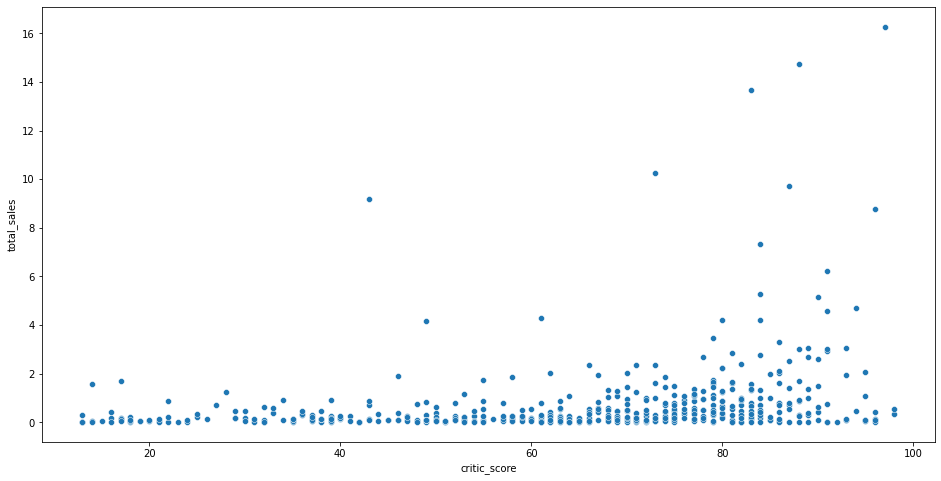

In [67]:
# membuat scatterplot untuk masing-masing yang ditentukan
plt.figure(figsize = (16, 8))
sns.scatterplot(data=x360_df_games_2011, x = 'critic_score', y='total_sales' )

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

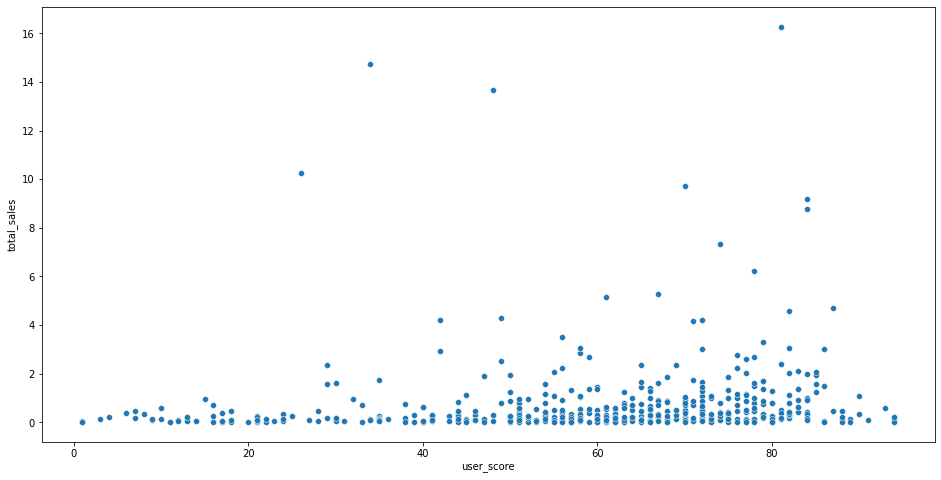

In [68]:
# membuat scatterplot untuk masing-masing yang ditentukan
plt.figure(figsize = (16, 8))
sns.scatterplot(data=x360_df_games_2011, x = 'user_score', y='total_sales' )

- <font color='green'>Kesimpulan Sementara</font>

Bisa dipastikan bahwa ke dua platform memiliki hasil yang mirip. X360 sebelumnya memiliki penjualan yang cukup tinggi untuk menembus tahun 2016. Namun tetap saja tidak membentuk pola linear untuk masing-masing kolom user_score dan critic_score terhadap kolom total_sales.

-------------------

### Mengamati Distribusi Umum Game Berdasarkan Genre

- Apa yang bisa kita simpulkan terkait genre yang paling menguntungkan? Kita akan melakukan generalisasi terkait genre dengan penjualan yang tinggi dan rendah?

- Kita akan mulai dari analisa yang paling tinggi setelah itu analisa yang paling rendah

In [69]:
# menganalisa distribusi paling tinggi pada genre
# memeriksa distribusi genre dengan value_count
df_games_2011['genre'].value_counts()

Action          1269
Role-Playing     465
Adventure        410
Sports           389
Misc             375
Shooter          329
Racing           180
Fighting         159
Simulation       136
Platform         122
Strategy         117
Puzzle            71
Name: genre, dtype: int64

In [70]:
# memeriksa lebih detail distribusi genre dengan agregasi kolom total_sales
# Menghitung total penjualan untuk setiap genre
genre_sales_high_2011 = df_games_2011.groupby('genre')['total_sales'].sum().reset_index()

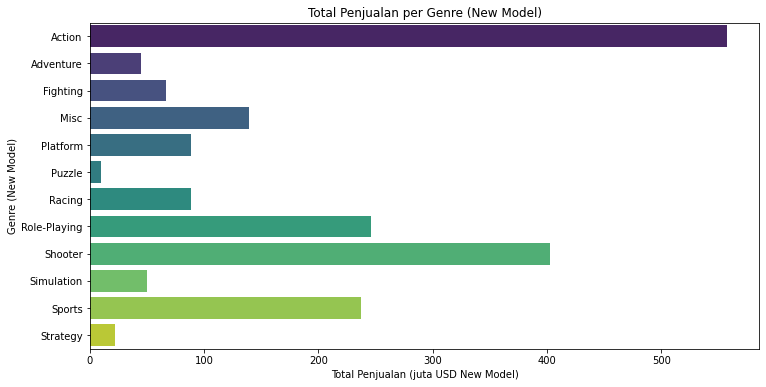

In [71]:
# Membuat bar plot visualisasi penjualan untuk platform
plt.figure(figsize=(12, 6))
sns.barplot(x='total_sales', y='genre', data=genre_sales_high_2011, palette='viridis')
plt.title("Total Penjualan per Genre (New Model)")
plt.xlabel('Total Penjualan (juta USD New Model)')
plt.ylabel('Genre (New Model)')
plt.show()

- Genre Action memiliki jumlah yang sangat tinggi. Mari kita lihat distribusi per tahunnya dalam total penjualan.

In [72]:
# Menemukan genre dengan total penjualan terbesar
genre_terbesar_2011 = genre_sales_high_2011[genre_sales_high_2011['total_sales'] == genre_sales_high_2011['total_sales'].max()]
print("Genre dengan total penjualan terbesar :")
print(genre_terbesar_2011)

Genre dengan total penjualan terbesar :
    genre  total_sales
0  Action        557.8


In [73]:
# membuat distribusi genre terbesar untuk data new model
# Memilih data penjualan hanya untuk genre terbesar
data_genre_terbesar_2011 = df_games_2011[df_games_2011['genre'] == genre_terbesar_2011['genre'].values[0]]

# Membuat distribusi penjualan per tahun
genre_sales_per_tahun_2011 = data_genre_terbesar_2011.groupby('year_of_release')['total_sales'].sum()

# Menampilkan distribusi penjualan
print("Distribusi penjualan per tahun untuk genre terbesar (New Model):")
print(genre_sales_per_tahun_2011)


Distribusi penjualan per tahun untuk genre terbesar (New Model):
year_of_release
2011    116.68
2012    119.25
2013    122.51
2014     97.23
2015     72.02
2016     30.11
Name: total_sales, dtype: float64


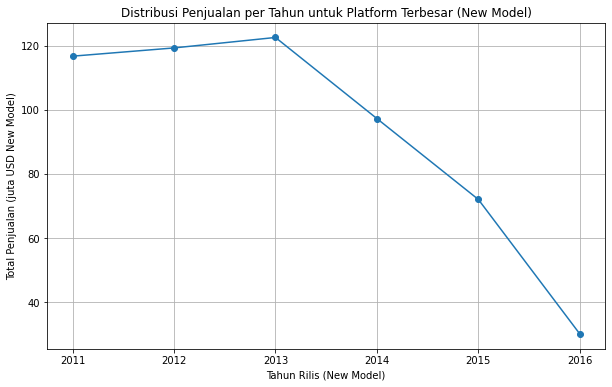

In [74]:
# Data distribusi penjualan per tahun
genre_tahun_2011 = genre_sales_per_tahun_2011.index
genre_penjualan_2011 = genre_sales_per_tahun_2011.values

# Membuat plot
plt.figure(figsize=(10, 6))
plt.plot(genre_tahun_2011, genre_penjualan_2011, marker='o', linestyle='-')
plt.title('Distribusi Penjualan per Tahun untuk Platform Terbesar (New Model)')
plt.xlabel('Tahun Rilis (New Model)')
plt.ylabel('Total Penjualan (juta USD New Model)')
plt.grid(True)
plt.show()


- <font color='green'>Kesimpulan Sementara</font>

Bisa dipastikan bahwa di sekitar tahun 2013. game Action sangatlah tinggi. Hal ini dengan minat yang banyak dan juga total penjualan yang banyak di tahun tersebut. Setelah itu mengalami penurunan cukup signifikan dalam kurun waktu 3 tahun.


- Mari kita analisa untuk distribusi terendah pada kolom Genre.

In [75]:
# memeriksa lebih detail distribusi genre dengan agregasi kolom total_sales (genre dengan nilai terendah)
# Menghitung total penjualan untuk setiap genre
genre_sales_low_2011 = df_games_2011.groupby('genre')['total_sales'].sum().reset_index()

In [76]:
# Menemukan genre dengan total penjualan terendah
genre_terendah_2011 = genre_sales_low_2011[genre_sales_low_2011['total_sales'] == genre_sales_low_2011['total_sales'].min()]
print("Genre dengan total penjualan terendah :")
print(genre_terendah_2011)

Genre dengan total penjualan terendah :
    genre  total_sales
5  Puzzle         9.85


In [77]:
# membuat distribusi genre terendah untuk data new model
# Memilih data penjualan hanya untuk genre terbesar
data_genre_terendah_2011 = df_games_2011[df_games_2011['genre'] == genre_terendah_2011['genre'].values[0]]

# Membuat distribusi penjualan per tahun
genre_sales_low_per_tahun_2011 = data_genre_terendah_2011.groupby('year_of_release')['total_sales'].sum()

# Menampilkan distribusi penjualan
print("Distribusi penjualan per tahun untuk genre terendah (New Model):")
print(genre_sales_low_per_tahun_2011)


Distribusi penjualan per tahun untuk genre terendah (New Model):
year_of_release
2011    4.96
2012    1.72
2013    0.96
2014    1.49
2015    0.71
2016    0.01
Name: total_sales, dtype: float64


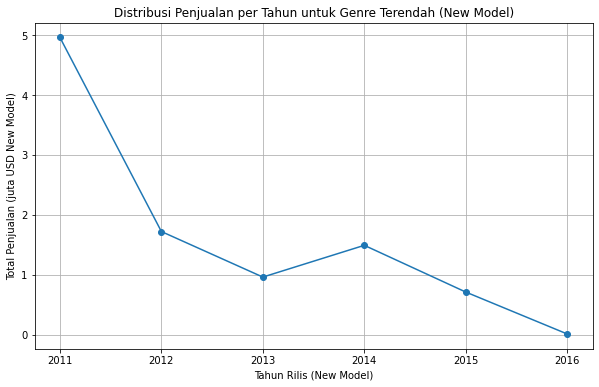

In [78]:
# Data distribusi penjualan per tahun
genre_tahun_low_2011 = genre_sales_low_per_tahun_2011.index
genre_penjualan_low_2011 = genre_sales_low_per_tahun_2011.values

# Membuat plot
plt.figure(figsize=(10, 6))
plt.plot(genre_tahun_low_2011, genre_penjualan_low_2011, marker='o', linestyle='-')
plt.title('Distribusi Penjualan per Tahun untuk Genre Terendah (New Model)')
plt.xlabel('Tahun Rilis (New Model)')
plt.ylabel('Total Penjualan (juta USD New Model)')
plt.grid(True)
plt.show()


- <font color='green'>Kesimpulan Sementara</font>

Bisa dipastikan genre puzzle merupakan genre yang memiliki penurunan signifikan pada setiap tahunnya. Puncak distribusi berada di tahun 2011 dan menurun hingga 5 tahun. Besar kemungkinan minat untuk game ber genre seperti itu sangatlah kurang.

---------

## Melakukan Pemrofilan Pengguna untuk Masing-Masing Wilayah

Untuk setiap wilayah (NA, EU, JP), tentukan:

- 5 platform teratas. Jelaskan variasi pangsa pasar dari satu wilayah ke wilayah lainnya.
- 5 genre teratas. Jelaskan perbedaannya.
- Apakah rating ESRB memengaruhi penjualan di masing-masing wilayah?

### Menghitung 5 Platform Teratas

In [79]:
# preview data
df_games_2011.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,82.0,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,81.0,M,16.27
2,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,34.0,M,14.73
3,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,23.0,53.0,NaN,14.63
4,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,51.0,92.0,NaN,14.60


In [80]:
# memeriksa platform berdasarkan total_sales
df_games_2011.groupby('platform')['total_sales'].sum().sort_values().reset_index()

,platform,total_sales
0,PS2,0.45
1,PSP,29.01
2,DS,38.73
3,PSV,53.81
4,WiiU,82.19
5,Wii,95.02
6,PC,97.68
7,XOne,159.32
8,3DS,257.81
9,PS4,314.14


In [81]:
# mengagregasikan dan mengelompokan platform berdasarkan wilayah yang ditentukan
platform_sales_sector = df_games_2011.groupby('platform')['na_sales', 'eu_sales', 'jp_sales'].sum()
platform_sales_sector2 = df_games_2011.groupby('platform')['na_sales', 'eu_sales', 'jp_sales'].sum().reset_index()

/tmp/ipykernel_73/2271852190.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  platform_sales_sector = df_games_2011.groupby('platform')['na_sales', 'eu_sales', 'jp_sales'].sum()
/tmp/ipykernel_73/2271852190.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  platform_sales_sector2 = df_games_2011.groupby('platform')['na_sales', 'eu_sales', 'jp_sales'].sum().reset_index()


In [82]:
platform_sales_sector2['total_sales'] = platform_sales_sector2[['na_sales', 'eu_sales', 'jp_sales']].sum(axis = 1)

In [83]:
platform_sales_sector2

,platform,na_sales,eu_sales,jp_sales,total_sales
0,3DS,82.65,61.27,100.62,244.54
1,DS,18.86,9.24,8.04,36.14
2,PC,29.88,56.70,0.00,86.58
3,PS2,0.13,0.13,0.09,0.35
4,PS3,168.26,163.10,49.39,380.75
5,PS4,108.74,141.09,15.96,265.79
6,PSP,2.19,1.77,24.04,28.00
7,PSV,12.47,13.07,21.84,47.38
8,Wii,48.56,29.60,8.97,87.13
9,WiiU,38.10,25.13,13.01,76.24


<Figure size 1440x576 with 0 Axes>

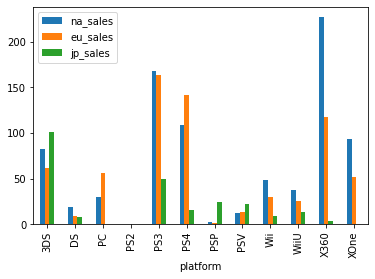

In [84]:
plt.figure(figsize=(20,8))
platform_sales_sector.plot(kind = 'bar');

- Mari kita tampilkan lagi melalui barplot

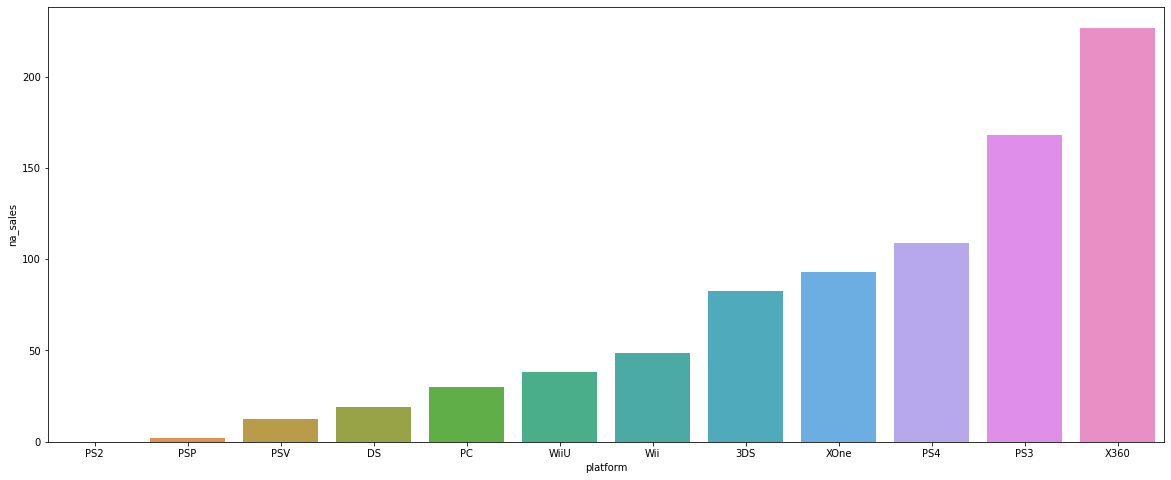

In [85]:
plt.figure(figsize=(20,8))
sns.barplot(data = platform_sales_sector2.sort_values(by='na_sales'), x = 'platform', y = 'na_sales' );

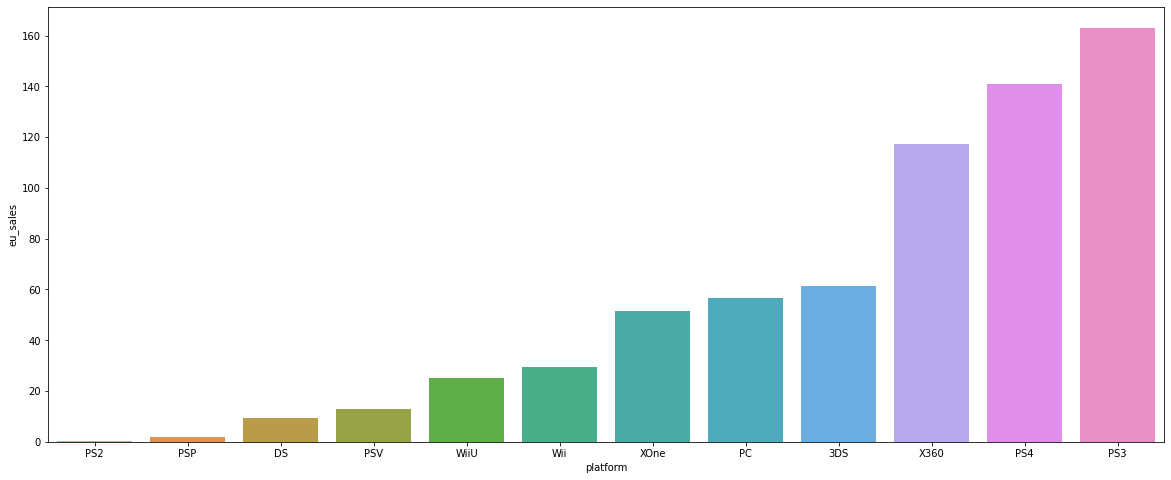

In [86]:
plt.figure(figsize=(20,8))
sns.barplot(data = platform_sales_sector2.sort_values(by='eu_sales'), x = 'platform', y = 'eu_sales' );

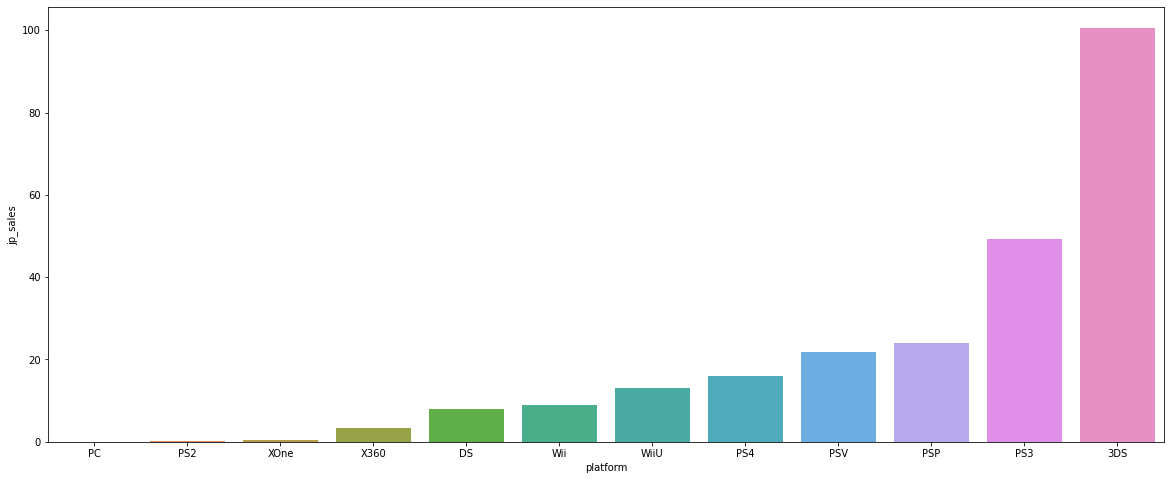

In [87]:
plt.figure(figsize=(20,8))
sns.barplot(data = platform_sales_sector2.sort_values(by='jp_sales'), x = 'platform', y = 'jp_sales' );

- <font color='green'>Kesimpulan Sementara</font>

5 Platform teratas untuk sektor NA yaitu:
1. X360
2. PS3
3. PS4
4. XOne
5. 3DS

5 Platform teratas untuk sektor EU yaitu:
1. PS3
2. PS4
3. X360
4. 3DS
5. PC

5 Platform teratas untuk sektor JP yaitu:
1. 3DS
2. PS3
3. PSP
4. PSV
5. PS4

-----------

### Menghitung 5 Genre Teratas

In [88]:
# mengagregasikan dan mengelompokan genre berdasarkan wilayah yang ditentukan
genre_sales_sector = df_games_2011.groupby('genre')['na_sales', 'eu_sales', 'jp_sales'].sum()
genre_sales_sector2 = df_games_2011.groupby('genre')['na_sales', 'eu_sales', 'jp_sales'].sum().reset_index()

/tmp/ipykernel_73/766890405.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  genre_sales_sector = df_games_2011.groupby('genre')['na_sales', 'eu_sales', 'jp_sales'].sum()
/tmp/ipykernel_73/766890405.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  genre_sales_sector2 = df_games_2011.groupby('genre')['na_sales', 'eu_sales', 'jp_sales'].sum().reset_index()


In [89]:
genre_sales_sector2['total_sales'] = genre_sales_sector2[['na_sales', 'eu_sales', 'jp_sales']].sum(axis = 1)

In [90]:
genre_sales_sector2

,genre,na_sales,eu_sales,jp_sales,total_sales
0,Action,230.92,199.12,63.62,493.66
1,Adventure,14.76,13.96,12.07,40.79
2,Fighting,31.63,16.24,12.38,60.25
3,Misc,69.69,39.72,17.60,127.01
4,Platform,38.28,30.07,12.13,80.48
5,Puzzle,2.74,3.56,2.91,9.21
6,Racing,31.98,40.58,5.64,78.20
7,Role-Playing,83.78,62.30,79.87,225.95
8,Shooter,194.43,148.02,11.92,354.37
9,Simulation,15.37,19.72,11.64,46.73


<Figure size 1440x576 with 0 Axes>

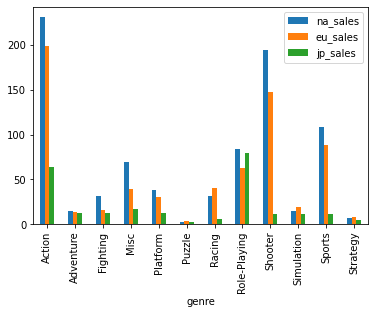

In [91]:
plt.figure(figsize=(20,8))
genre_sales_sector.plot(kind = 'bar');

- Mari kita lihat lebih jelas lagi

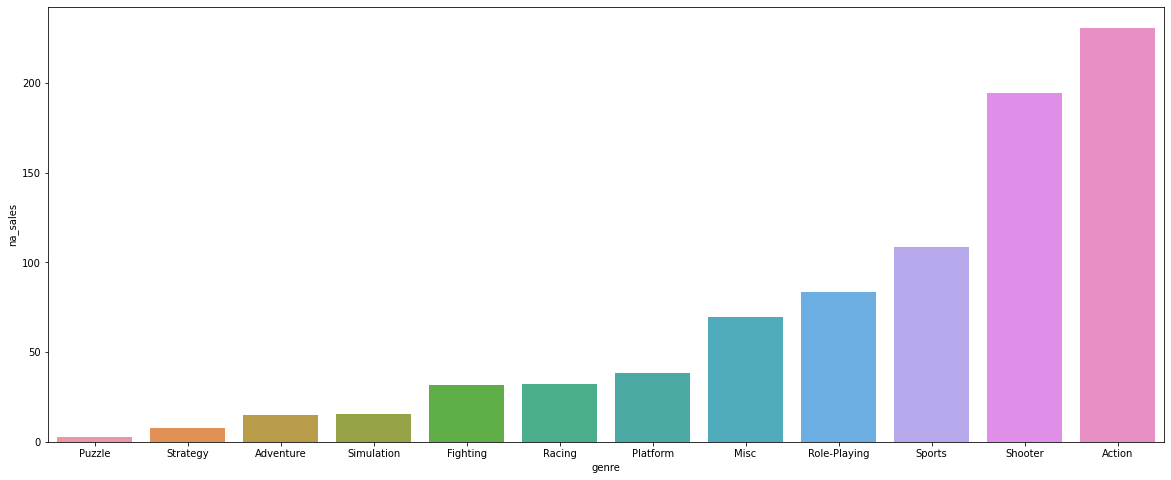

In [92]:
plt.figure(figsize=(20,8))
sns.barplot(data = genre_sales_sector2.sort_values(by='na_sales'), x = 'genre', y = 'na_sales' );

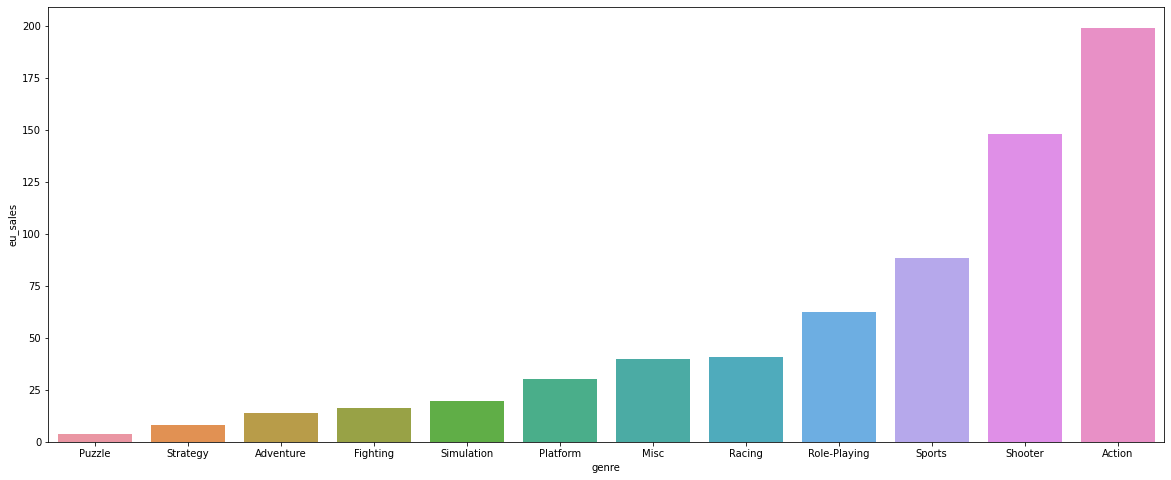

In [93]:
plt.figure(figsize=(20,8))
sns.barplot(data = genre_sales_sector2.sort_values(by='eu_sales'), x = 'genre', y = 'eu_sales' );

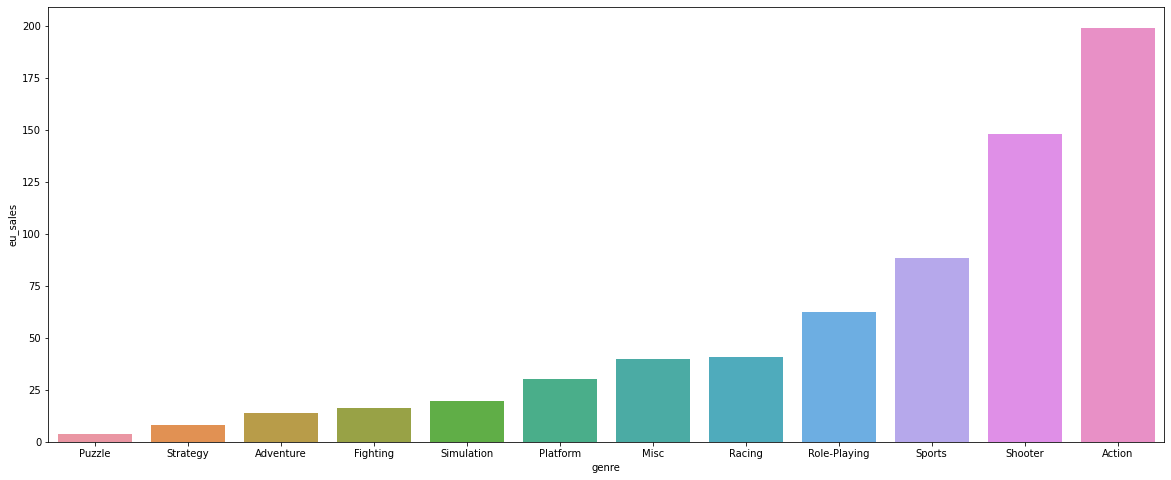

In [94]:
plt.figure(figsize=(20,8))
sns.barplot(data = genre_sales_sector2.sort_values(by='eu_sales'), x = 'genre', y = 'eu_sales' );

- <font color='green'>Kesimpulan Sementara</font>

5 Genre teratas untuk sektor NA yaitu:
1. Action
2. Shooter
3. Sports
4. Role-Playing
5. Misc

5 Genre teratas untuk sektor EU yaitu:
1. Action
2. Shooter
3. Sports
4. Role-Playing
5. Racing

5 Genre teratas untuk sektor JP yaitu:
1. Action
2. Shooter
3. Sports
4. Role-Playing
5. Racing

-------

## Menguji Hipotesis Rata-rata rating pengguna platform Xbox One dan PC adalah sama dan —Rata-rata rating pengguna genre Action dan Sports berbeda

- Bagaimana kita merumuskan hipotesis nol dan hipotesis alternatif 
- Berapa tingkat signifikansi yang kita pilih untuk menguji hipotesis 

Hipotesis yang kita gunakan:

- Rata-rata rating pengguna platform Xbox One dan PC adalah sama. 

- Rata-rata rating pengguna genre Action dan Sports berbeda.

### Uji Hipotesis Platform Xbox One dan PC

- <font color='blue'>H0 : Rata-rata rating pengguna platform Xbox One dan PC adalah SAMA.</font>
- <font color='red'>H1 : Rata-rata rating pengguna platform Xbox One dan PC adalah TIDAK SAMA.</font>

Alpha : 0.05

In [95]:
# memeriksa value
df_games_2011['platform'].value_counts()

PS3     708
3DS     512
X360    498
PSV     429
PS4     392
PC      389
PSP     312
XOne    247
Wii     197
DS      184
WiiU    147
PS2       7
Name: platform, dtype: int64

In [96]:
# memfilter kolom yang akan digunakan untuk hipotesis
df_games_2011_pc = df_games_2011[(df_games_2011['platform'] == 'PC') & (df_games_2011['user_score'])]
df_games_2011_xone = df_games_2011[(df_games_2011['platform'] == 'XOne') & (df_games_2011['user_score'])]

In [97]:
df_games_2011_pc.shape, df_games_2011_xone.shape

((387, 12), (247, 12))

In [98]:
# mengenralisir varians untuk masing-masing platform dengan konversi persentase
np.var(df_games_2011_pc['user_score'])/100, np.var(df_games_2011_xone['user_score'])/100


(4.047410612343009, 3.91503155272173)

- Di sini kita akan menggunakan metode Levene's test. Levene's test adalah uji statistik yang digunakan untuk menguji homogenitas varians antara dua atau lebih kelompok atau sampel dalam analisis statistik.

In [99]:
# H0 : Rata-rata rating pengguna platform Xbox One dan PC adalah SAMA.
# H1 : Rata-rata rating pengguna platform Xbox One dan PC adalah TIDAK SAMA.
# Alpha : 0.05

alpha = 0.05

p_value_levene = st.levene(df_games_2011_pc['user_score'], df_games_2011_xone['user_score']).pvalue
print(p_value_levene)

if p_value_levene < alpha:
    print('MENERIMA H1')
else:
    print('MENERIMA H0')



0.3854500719171684
MENERIMA H0


- <font color='green'>Kesimpulan Sementara</font>

Uji Hipotesis untuk platform Xbox One dan PC: Menerima H0: Rata-rata rating pengguna platform Xbox One dan PC adalah SAMA.

--------

### Uji Hipotesis Genre Action dan PC

- <font color='blue'>H0 : Rata-rata rating pengguna genre Action dan Sports TIDAK SAMA.</font>
- <font color='red'>H1 : Rata-rata rating pengguna genre Action dan Sports SAMA.</font>

Alpha : 0.05

In [100]:
# memfilter kolom yang akan digunakan untuk hipotesis
df_games_2011_action = df_games_2011[(df_games_2011['genre'] == 'Action') & (df_games_2011['user_score'])]
df_games_2011_sports = df_games_2011[(df_games_2011['genre'] == 'Sports') & (df_games_2011['user_score'])]

In [101]:
df_games_2011_action.shape, df_games_2011_sports.shape

((1269, 12), (385, 12))

In [102]:
# mengenralisir varians untuk masing-masing platform dengan konversi persentase
np.var(df_games_2011_action['user_score'])/100, np.var(df_games_2011_sports['user_score'])/100

(5.410023541305335, 4.529497723056165)

- Sama seperti sebelumnya, kita akan menggunakan methode Levene

In [103]:
# H0 : Rata-rata rating pengguna genre Action dan Sports adalah TIDAK SAMA.
# H1 : Rata-rata rating pengguna genre Action One dan Sports adalah SAMA.
# Alpha : 0.05

alpha = 0.05

p_value_levene_genre = st.levene(df_games_2011_action['user_score'], df_games_2011_sports['user_score']).pvalue
print(p_value_levene_genre)

if p_value_levene_genre < alpha:
    print('MENERIMA H1')
else:
    print('MENERIMA H0')


0.13009280655101707
MENERIMA H0


- <font color='green'>Kesimpulan Sementara</font>

Uji Hipotesis untuk genre Action dan Sports Menerima H0: Rata-rata rating pengguna genre Action dan Sports adalah TIDAK SAMA.

----------

## Kesimpulan Umum

-	Dari tampilan di atas ternyata data tidak sangat simetris. Beberapa baris sedikitnya memiliki data nilai yang kosong berbeda dengan kolom yang lainnya(tidak kosong yang serupa).

-	Untuk saat ini kita tidak perlu mengubah beberapa dari kolom penjualan. Hal itu dirasa sudah sesuai, Karena pada dasarnya nilai bawaannya lebih dominan di tipe data float. Kita mungkin harus mengubah tipe data year_of_release sebagai int64 agar mudah untuk memfilter tahun. Menggunakan pd.to_datime merupakan hal yang tidak direkomendasikan, dikarenakan memiliki detail tanggal. Di sini kita hanya memerlukan tahun rilisnya saja. Kita bisa lihat sekarang kita memiliki tahun yang sudah dipotong yaitu hanya yang relevan pada tahun 2000 hingga 2016. Sehingga entry data sekarang menjadi 14470. Sekarang kita masih memiliki 3 kolom yang nilainya masih hilang.

-	Berhubung kita sudah mengikis tahun-tahun yang hilang, kita hanya perlu mengurus nilai hilang pada kolom critic_score, user_score dan rating. Sample di atas sekarang sudah memiliki pola yang cukup baik.

-	Untuk sementara, ke dua kolom tersebut yaitu critic_score dan user_score yang nilainya hilang terlah diisi oleh nilai acak. Untuk kolom rating, kita akan biarkan kolom tersebut dengan seadanya.

-	Kita bisa lihat dengan plot yang dihasilkan, bahwa pada tahun 2008-2009 merupakan puncak performa sebuah game yang berfrekuensi tinggi. Setelah ke 2 tahun itu lewat, penjualan jumlah game di tahun yang berbeda mengalami penurunan yang cukup signifikan.

-	Kita bisa asumsikan dari data tersebut bahwa besarnya popularitas diakibatkan oleh banyaknya total penjualan untuk setiap tahunnya.

-	Seperti yang kita sebutkan, platform terbesar pada penjualan ini di rentang tahun 2000 hingga 2016 adalah PS2 dengan total penjualan sekitar 1233.56 juta USD. Platform tersebut mengalami penurunan disekitar tahun 2010, yang berarti PS2 mengalami kejadian ini cukup lama yaitu tumbuh dan memudarnya sekitar 10 tahun.

-	Untuk permodelan baru saat ini PS3 memiliki potensi besar untuk penjualan. Namun kita bisa mengetahui bahwa popularitas X360 masih banyak dalam high demand. Besar kemungkinan PS4 akan mungkin menyusul keduanya.

-	Bisa dipastikan bahwa penjualan PS3 akan semakin menyusut dikarenakan trend yang akan datang.

-	Bisa kita lihat bahwa PS4 memiliki kemungkinan besar untuk tumbuh di tahun-tahun berikutnya. Hal ini merupakan memang sudah jelas karena PS4 merupakan sebuah upgrade dari PS3 yang memungkinkan untuk mewadahi game-game dengan performa yang lebih tinggi. Mungkin kita bisa beranggapan bahwa PS4 sedang menuju transisi untuk tumbuh atau baru saja rilis di sekitar tahun 2012.

-	Dengan garis merah yang kita buat, kita bisa mengetahui penjualan yang di atas rata-rata. Penjualan pada platform X360 masih signifikan, namun tidak menutup kemungkinan bahwa penjualan PS4 akan melonjak lebih tinggi. Hal ini dikarenakan dari kesimpulan sementara pada sub bab sebelumnya, bahwa platform PS4 memiliki potensial cukup besar untuk tumbuh.

-	Dari kedua yang ditampilkan bisa dipastikan bahwa scatter plot yang dibuat belum ada kolerasi yang kuat atau pola yang berbentuk linier.

-	Bisa dipastikan bahwa ke dua platform memiliki hasil yang mirip. X360 sebelumnya memiliki penjualan yang cukup tinggi untuk menembus tahun 2016. Namun tetap saja tidak membentuk pola linear untuk masing-masing kolom user_score dan critic_score terhadap kolom total_sales.

-	Bisa dipastikan bahwa di sekitar tahun 2013. game Action sangatlah tinggi. Hal ini dengan minat yang banyak dan juga total penjualan yang banyak di tahun tersebut. Setelah itu mengalami penurunan cukup signifikan dalam kurun waktu 3 tahun.

-	Bisa dipastikan genre puzzle merupakan genre yang memiliki penurunan signifikan pada setiap tahunnya. Puncak distribusi berada di tahun 2011 dan menurun hingga 5 tahun. Besar kemungkinan minat untuk game ber genre seperti itu sangatlah kurang.

- Pemfilteran Platform Teratas Untuk Setiap Wilayah:

5 Platform teratas untuk sektor NA yaitu:

1.	X360

2.	PS3

3.	PS4

4.	XOne

5.	3DS

5 Platform teratas untuk sektor EU yaitu:

1.	PS3

2.	PS4

3.	X360

4.	3DS

5.	PC

5 Platform teratas untuk sektor JP yaitu:

1.	3DS

2.	PS3

3.	PSP

4.	PSV

5.	PS4






- Pemfilteran Genre Teratas Untuk Setiap Wilayah:

5 Genre teratas untuk sektor NA yaitu:

1.	Action

2.	Shooter

3.	Sports

4.	Role-Playing

5.	Misc

5 Genre teratas untuk sektor EU yaitu:

1.	Action

2.	Shooter

3.	Sports

4.	Role-Playing

5.	Racing

5 Genre teratas untuk sektor JP yaitu:

1.	Action

2.	Shooter

3.	Sports

4.	Role-Playing

5.	Racing



- Hasil Uji Hipotesis:

Uji Hipotesis untuk platform Xbox One dan PC: Menerima H0: Rata-rata rating pengguna platform Xbox One dan PC adalah SAMA.

Uji Hipotesis untuk genre Action dan Sports Menerima H0: Rata-rata rating pengguna genre Action dan Sports adalah TIDAK SAMA.
